# Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sys.path.append("/Users/paolo/Documents/methods/CMI_FS")
from feature_selection import forwardFeatureSelection

sys.path.append("/Users/paolo/Documents/methods/LinCFA")
from LinCFA import LinCFA

sys.path.append("/Users/paolo/Documents/Droughts/Paolo/regression_LinCFA")
from aux import standardize,unfold_dataset,compute_r2,prepare_target,prepare_features,aggregate_unfolded_data,FS_with_linearWrapper,compare_methods


In [2]:
def plot_cells(output,selected_colnames, xmin=9, xmax=11, ymin=44, ymax=45.5):
    x = []
    y = []
    colors = cm.rainbow(np.linspace(0,1,len(output)))
    fig, ax = plt.subplots(2)
    ax[0].set_xlim(xmin,xmax)
    ax[1].set_xlim(xmin,xmax)
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_ylim(ymin,ymax)
    for i in range(len(output)): 
        #print(len(output[i]))
        x = []
        y = []
        
        for datum in output[i]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[0].scatter(x,y,color=colors[i])
    
    x = []
    y = []
    col = cm.rainbow(np.linspace(0,1,len(selected_colnames)))
    for i in range(len(selected_colnames)): 
        idx = int(selected_colnames[i].split('_')[-1])
        for datum in output[idx]:
            x.append(float(datum.split('_')[1]))
            y.append(float(datum.split('_')[2]))
        ax[1].scatter(x,y,color=col[i])
    

# Target 

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))


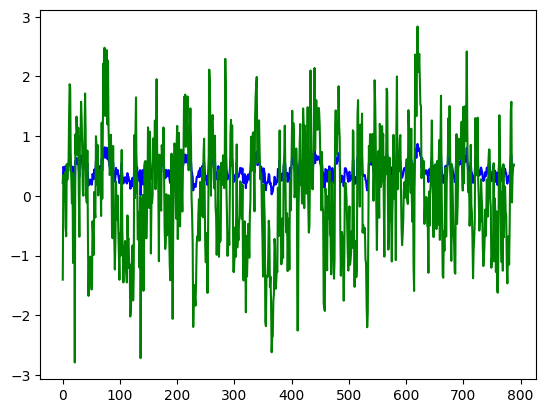

In [3]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')
plt.plot(target_df_trainVal.loc[:,'mean'], color='blue')
plt.plot(target_df_trainVal.loc[:,'mean_std'], color='green')

# 1) Aggregations: temperature, precipitation, both

## temperature

### full data

In [3]:
import glob
path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'
filenames = glob.glob(path + "/*.csv")

df = []
for file in filenames:
    df.append(pd.read_csv(file))
    
df = pd.concat(df, ignore_index=True)
print(min(df.x),max(df.x),min(df.y),max(df.y))
df

6.649860364384157 12.949860339180924 43.74986055078544 46.54986054189981


,date,y,x,year,week,cyclostationary_mean_tg,cyclostationary_mean_rr,cyclostationary_mean_tg_1w,cyclostationary_mean_tg_4w,cyclostationary_mean_tg_8w,cyclostationary_mean_tg_12w,cyclostationary_mean_tg_16w,cyclostationary_mean_tg_24w,cyclostationary_mean_rr_1w,cyclostationary_mean_rr_4w,cyclostationary_mean_rr_8w,cyclostationary_mean_rr_12w,cyclostationary_mean_rr_16w,cyclostationary_mean_rr_24w
0,2001-01-05,43.749861,12.14986,2001,1,2.009904,3.832692,2.009904,2.009904,2.009904,2.009904,2.009904,2.009904,3.832692,3.832692,3.832692,3.832692,3.832692,3.832692
1,2001-01-05,43.749861,12.24986,2001,1,2.067019,5.870192,2.067019,2.067019,2.067019,2.067019,2.067019,2.067019,5.870192,5.870192,5.870192,5.870192,5.870192,5.870192
2,2001-01-05,43.749861,12.34986,2001,1,1.852115,6.747115,1.852115,1.852115,1.852115,1.852115,1.852115,1.852115,6.747115,6.747115,6.747115,6.747115,6.747115,6.747115
3,2001-01-05,43.749861,12.44986,2001,1,1.326058,6.315385,1.326058,1.326058,1.326058,1.326058,1.326058,1.326058,6.315385,6.315385,6.315385,6.315385,6.315385,6.315385
4,2001-01-05,43.749861,12.54986,2001,1,0.919712,5.876923,0.919712,0.919712,0.919712,0.919712,0.919712,0.919712,5.876923,5.876923,5.876923,5.876923,5.876923,5.876923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972166,2022-06-24,45.149861,9.94986,2022,25,2.690385,-2.800962,2.272010,2.329204,1.385630,0.870501,1.147244,0.936656,-1.272072,-1.413951,-1.272724,-1.360520,-1.324643,-1.008920
972167,2022-06-24,45.149861,10.04986,2022,25,3.044231,-2.908654,2.598934,2.706495,1.759349,1.269219,1.527790,1.217671,-1.620804,-1.550787,-1.354406,-1.371571,-1.327258,-1.002166
972168,2022-06-24,45.249861,9.54986,2022,25,3.776635,-1.676923,3.400022,3.327979,2.531039,1.964117,2.186415,1.916099,-0.938462,-1.116958,-1.169462,-1.253882,-1.240283,-1.040775
972169,2022-06-24,45.249861,9.84986,2022,25,3.044519,-2.306731,2.604873,2.643358,1.767176,1.255820,1.511847,1.283886,-1.231774,-1.335385,-1.283196,-1.366569,-1.330153,-1.049503


In [4]:
df.columns

Index(['date', 'y', 'x', 'year', 'week', 'cyclostationary_mean_tg',
       'cyclostationary_mean_rr', 'cyclostationary_mean_tg_1w',
       'cyclostationary_mean_tg_4w', 'cyclostationary_mean_tg_8w',
       'cyclostationary_mean_tg_12w', 'cyclostationary_mean_tg_16w',
       'cyclostationary_mean_tg_24w', 'cyclostationary_mean_rr_1w',
       'cyclostationary_mean_rr_4w', 'cyclostationary_mean_rr_8w',
       'cyclostationary_mean_rr_12w', 'cyclostationary_mean_rr_16w',
       'cyclostationary_mean_rr_24w'],
      dtype='object')

In [5]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w' 
                                                                         ],
                                                                   target_df_trainVal,multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)




target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 17

Number of features: 991

Number of aggregated features: 18

Number of features: 991

Number of aggregated features: 18

Number of features: 991

Number of aggregated featu

In [6]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 0.5699186964999685, test score: -1.1247306018153829
Aggregate regression train score with FS: 0.23736954151959888, test score: -0.048168562357097544
Full aggregate regression train score: 0.5699186964999685, test score: -1.1247306018153829
Aggregate regression train score with FS: 0.2544565220527384, test score: -0.09091229520568933


### not considering last years

In [7]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w' 
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 12

Number of features: 991

Number of aggregated features: 15

Number of features: 991

Number of aggregated features: 13

Number of features: 991

Number of aggregated featu

In [8]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 0.5864475531050841, test score: -2.3383063002914315
Aggregate regression train score with FS: 0.2444965908298533, test score: 0.24215527161276673
Full aggregate regression train score: 0.5864475531050841, test score: -2.3383063002914315
Aggregate regression train score with FS: 0.29323947528640826, test score: 0.04956965490170584


### repeat both with CMI FS

In [9]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w' 
                                                                         ],target_df_trainVal,multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 17

Number of features: 991

Number of aggregated features: 18

Number of features: 991

Number of aggregated features: 18

Number of features: 991

Number of aggregated featu

In [10]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w' 
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 12

Number of features: 991

Number of aggregated features: 15

Number of features: 991

Number of aggregated features: 13

Number of features: 991

Number of aggregated featu

## precipitation

### full data

In [11]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w' 
                                                                         ],
                                                                   target_df_trainVal,multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 23

Number of features: 991

Number of aggregated features: 40

Number of features: 991

Number of aggregated features: 42

Number of features: 991

Number of aggregated featu

In [12]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 0.570143860193246, test score: -0.1900682280131989
Aggregate regression train score with FS: 0.23287565970012902, test score: 0.19911503062903702
Full aggregate regression train score: 0.570143860193246, test score: -0.1900682280131989
Aggregate regression train score with FS: 0.25839961387297816, test score: 0.14619797028550519


### not considering last years

In [13]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w' 
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 26

Number of features: 991

Number of aggregated features: 36

Number of features: 991

Number of aggregated features: 30

Number of features: 991

Number of aggregated featu

In [14]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 0.5638525597047267, test score: -0.5792186202726086
Aggregate regression train score with FS: 0.22609829034309015, test score: -0.036331161288709835
Full aggregate regression train score: 0.5638525597047267, test score: -0.5792186202726086
Aggregate regression train score with FS: 0.2594291140694712, test score: -0.16224153744622516


### repeat both with CMI FS

In [15]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w' 
                                                                         ],target_df_trainVal,multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 23

Number of features: 991

Number of aggregated features: 40

Number of features: 991

Number of aggregated features: 42

Number of features: 991

Number of aggregated featu

CMI: 0.0162086271422808
CMI: 0.02030907698636955
CMI: 0.024367653443057663
CMI: 0.008431352469206288
CMI: 0.023320703433699602
CMI: 0.022952568254644812
CMI: 0.011693563881413988
CMI: 0.013464965382827848
CMI: 0.01303937868153951
CMI: 0.01805718860403019
CMI: 0.01373735765514808
CMI: 0.022976856722381145
CMI: 0.004797482087527033
CMI: 0.009453256920418318
CMI: 0.01463575555597954
CMI: 0.0013831452148353185
Highest CMI score: 0.02818221960032899
Adding original feature: 31
CMI: 0.007555077864882881
CMI: 0.005145428377029138
CMI: 0.008767515909695128
CMI: 0.0021291930994051522
CMI: 0.0042485856933613675
CMI: 0.003165458889068079
CMI: 0.0012281885664826853
CMI: 0.009363186553400266
CMI: 0.011385595948458282
CMI: 0.010710989114736835
CMI: 0.006875518816054554
CMI: 0.008656587767850915
CMI: 0.015870314102978483
CMI: 0.005697809205579829
CMI: 0.0044998498491196914
CMI: 0.004467769982752334
CMI: 0.0033174485360002726
CMI: 0.005028560574135921
CMI: 0.020894998536248016
CMI: 0.02151215185166485

In [16]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w' 
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 26

Number of features: 991

Number of aggregated features: 36

Number of features: 991

Number of aggregated features: 30

Number of features: 991

Number of aggregated featu

CMI: 0.006810676911874841
CMI: 0.0003894815917769856
CMI: 0.006351969276642722
CMI: 0.002449190532476969
CMI: 0.012064889418532038
CMI: 0.007945307895464604
CMI: 0.0022072840200793864
CMI: 0.0018014024579652566
CMI: 0.024012728131077965
CMI: 0.03346232254720807
CMI: 0.007717053308487237
CMI: 0.006301800816117559
CMI: 0.006761302777913453
CMI: 0.001763515234163543
CMI: 0.0010612247011268228
CMI: 0.003821024474682244
CMI: 0.011096144849710748
CMI: 0.008330975028102344
CMI: 0.010191782025033819
CMI: 0.001401013303171439
CMI: 0.006135055751648716
CMI: 0.001747243688729333
CMI: 0.004219734192394686
CMI: 0.008004362965051443
CMI: 0.013658813240005896
CMI: 0.029099591408473208
CMI: 0.0185843400452608
CMI: 0.01989552944463871
CMI: 0.013829367495038686
CMI: 0.004226034810538876
CMI: 0.024930617010961664
CMI: 0.0010519853484278474
CMI: 0.007057236941759221
CMI: 0.0003617081529760924
CMI: 0.004294906922996555
CMI: 0.02293501857033997
CMI: 0.021144311352036232
CMI: 0.01335770095741487
CMI: 0.01823

## both

### full data

In [17]:
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w', 
                                                                         'cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'  
                                                                         ],
                                                                   target_df_trainVal,multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)

target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 17

Number of features: 991

Number of aggregated features: 18

Number of features: 991

Number of aggregated features: 18

Number of features: 991

Number of aggregated featu

In [18]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 0.7301615350510935, test score: -2.802119948552454
Aggregate regression train score with FS: 0.2927067757084586, test score: 0.10411290696815523
Full aggregate regression train score: 0.7301615350510935, test score: -2.802119948552454
Aggregate regression train score with FS: 0.338257291869802, test score: 0.03859658473698746


### not considering last years

In [19]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w', 
                                                                         'cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'  
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

selected_colnames = FS_with_linearWrapper(aggregate_trainVal, target_df_train, target_df_val, 50, 228)

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 12

Number of features: 991

Number of aggregated features: 15

Number of features: 991

Number of aggregated features: 13

Number of features: 991

Number of aggregated featu

In [20]:
### forcing a low number of features
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:5])

compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames[0:10])


Full aggregate regression train score: 0.7424846328561507, test score: -7.973731717396019
Aggregate regression train score with FS: 0.2889853263379385, test score: 0.2903491316660253
Full aggregate regression train score: 0.7424846328561507, test score: -7.973731717396019
Aggregate regression train score with FS: 0.3213508358535988, test score: 0.16924990864684009


### repeat both with CMI FS

In [21]:
### all data
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w', 
                                                                         'cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'  
                                                                         ],target_df_trainVal,multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.402730
1    2001-01-13  0.484737    0.52  2001     2  0.347916
2    2001-01-21  0.466071    0.47  2001     3  0.227090
3    2001-01-29  0.417470    0.44  2001     5 -0.087501
4    2001-02-06  0.492202    0.53  2001     6  0.396235
..          ...       ...     ...   ...   ...       ...
584  2013-10-21  0.739946    0.79  2013    43  1.999865
585  2013-10-29  0.447691    0.46  2013    44  0.108118
586  2013-11-06  0.541628    0.56  2013    45  0.716163
587  2013-11-14  0.493719    0.53  2013    46  0.406051
588  2013-11-22  0.527436    0.57  2013    47  0.624301

[589 rows x 6 columns]
 target shapes: ((589, 6), (200, 6), (789, 6), (192, 6))
Number of features: 991

Number of aggregated features: 17

Number of features: 991

Number of aggregated features: 18

Number of features: 991

Number of aggregated features: 18

Number of features: 991

Number of aggregated featu

CMI: 0.03512162928773693
CMI: 0.04061494421671022
CMI: 0.04876287221969067
CMI: 0.032653161059468555
CMI: 0.050560599847544435
CMI: 0.03816301461793706
CMI: 0.044056884484047876
CMI: 0.035586843918382766
CMI: 0.034952516623584756
CMI: 0.020321508583642983
CMI: 0.029896598255072127
CMI: 0.02891753829186275
CMI: 0.023935787329248503
CMI: 0.014100165716202262
CMI: 0.016050524602320093
CMI: 0.02095656399018478
CMI: 0.05361132696086013
CMI: 0.04623068904763411
CMI: 0.042685597226635896
CMI: 0.0235879764269952
CMI: 0.024245862756648195
CMI: 0.02691659435448565
CMI: 0.03744137786731097
CMI: 0.025212043794982847
CMI: 0.03219610824238184
CMI: 0.021136833147002793
CMI: 0.001252788303960306
CMI: 0.003196264322254283
CMI: 0.00044818709337174356
CMI: 0.0005216173288185855
CMI: 0.004723394508068635
CMI: 0.0003836303321697043
CMI: 0.006818932607107253
CMI: 0.007315782195443904
CMI: 0.01260480058245489
CMI: 0.010960327389626379
CMI: 0.013262036363522411
CMI: 0.021980973118774366
CMI: 0.021365568770378

CMI: 0.0006035273452314749
CMI: 3.618992502671392e-05
Highest CMI score: 0.024979353317641118
Adding original feature: 39
CMI: 0.0032091418992964416
CMI: 0.0008942894202733087
CMI: 0.002739272539226012
CMI: 0.007351530652911553
CMI: 0.00016930223118094556
CMI: 0.004201346521326921
CMI: 0.005083858443273026
CMI: 0.006048114193440091
CMI: 0.00034858648974672723
CMI: 0.006772058391635305
CMI: 0.0008056199706832357
CMI: 0.0028143002796073846
Highest CMI score: 0.007351530652911553
Adding original feature: 190
CMI: 0.0002057690276580093
CMI: 0.0006725562478376856
CMI: 0.0004597813952617602
CMI: 0.0036390601415288715
CMI: 0.0019082953677819203
CMI: 0.00040136867019896494
Highest CMI score: 0.0036390601415288715
Adding original feature: 233
CMI: 0.00025101588972037403
CMI: 0.0008836765954916559
Highest CMI score: 0.0008836765954916559
Adding original feature: 285
CMI: 0.0021692715012219255
Highest CMI score: 0.0021692715012219255
Adding original feature: 200
Highest CMI score: -0.000139512826

In [22]:
### what happens without considering the last years?
target_df_train,target_df_val,target_df_test,target_df_trainVal = prepare_target('',max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01')

path='/Users/paolo/Documents/OneDrive - Politecnico di Milano/droughts/features/csv_allvalues/temporal_aggreg'

output,aggregate_trainVal,aggregate_test = aggregate_unfolded_data(path,['cyclostationary_mean_tg', 
                                                                         'cyclostationary_mean_tg_1w',
                                                                         'cyclostationary_mean_tg_4w', 
                                                                         'cyclostationary_mean_tg_8w',
                                                                         'cyclostationary_mean_tg_12w', 
                                                                         'cyclostationary_mean_tg_16w',
                                                                         'cyclostationary_mean_tg_24w', 
                                                                         'cyclostationary_mean_rr', 
                                                                         'cyclostationary_mean_rr_1w',
                                                                         'cyclostationary_mean_rr_4w', 
                                                                         'cyclostationary_mean_rr_8w',
                                                                         'cyclostationary_mean_rr_12w', 
                                                                         'cyclostationary_mean_rr_16w',
                                                                         'cyclostationary_mean_rr_24w'  
                                                                         ],target_df_trainVal, max_train='2010-01-01', max_val='2015-01-01', max_test='2020-01-01', multiple=True, neigh=0)

res = {
    "delta" : [], # list with all deltas
    "numSelected" : [], #
    "selectedFeatures" : [] 
}

res['selectedFeatures'] = forwardFeatureSelection(10,np.array(aggregate_trainVal),np.array(target_df_trainVal.mean_std),res,10,1)
selectedFeatures='selectedFeatures'
print(f'\n{res[selectedFeatures]}\n')
selected_colnames = aggregate_trainVal.columns[res['selectedFeatures']]
compare_methods(aggregate_trainVal, aggregate_test, target_df_trainVal, target_df_test, selected_colnames)


target samples:            date      mean  median  year  week  mean_std
0    2001-01-05  0.214281    0.00  2001     1 -1.339879
1    2001-01-13  0.484737    0.52  2001     2  0.402993
2    2001-01-21  0.466071    0.47  2001     3  0.282703
3    2001-01-29  0.417470    0.44  2001     5 -0.030490
4    2001-02-06  0.492202    0.53  2001     6  0.451097
..          ...       ...     ...   ...   ...       ...
406  2009-11-27  0.436464    0.46  2009    48  0.091910
407  2009-12-05  0.466152    0.49  2009    49  0.283224
408  2009-12-13  0.553659    0.59  2009    50  0.847138
409  2009-12-21  0.507978    0.65  2009    52  0.552758
410  2009-12-29  0.083046    0.00  2009    53 -2.185583

[411 rows x 6 columns]
 target shapes: ((411, 6), (228, 6), (639, 6), (228, 6))
Number of features: 991

Number of aggregated features: 12

Number of features: 991

Number of aggregated features: 15

Number of features: 991

Number of aggregated features: 13

Number of features: 991

Number of aggregated featu

CMI: 0.01428195255504991
CMI: 0.03256366900763924
CMI: 0.029665388684379373
CMI: 0.027013601746230326
CMI: 0.012643365123598788
CMI: 0.01671131233678999
CMI: 0.0031345444403633738
CMI: 0.011750353764326288
CMI: 0.0012921357467931827
CMI: 0.019841829771252567
CMI: 0.016796491205511632
CMI: 0.016120039292750965
CMI: 0.015716949066922142
CMI: 0.01191769801120493
CMI: 0.001232261932766654
CMI: 0.02429438846756979
CMI: 0.005425938540426473
CMI: 0.008689413279253683
CMI: 0.0003536689702657303
CMI: 0.008181344715952443
CMI: 0.014860575569413337
CMI: 0.0012355611168958502
CMI: 0.0012529521146077138
CMI: 0.006798669994187989
CMI: 0.023560170141508213
CMI: 0.002818437438506155
CMI: 0.03444433643488143
CMI: 0.011127733827064612
CMI: 0.007380057495515957
CMI: 0.010354207451642533
CMI: 0.003328127738646186
CMI: 0.008391733530869167
CMI: 0.012564329231227106
CMI: 0.005600787448859251
CMI: 0.004028937508749303
CMI: 0.004766082430778584
CMI: 0.008430836778387185
CMI: 0.0009388299253688392
CMI: 0.01261

CMI: 0.0011063359171046283
CMI: 0.0009908087236589758
Highest CMI score: 0.0011063359171046283
Adding original feature: 195
CMI: 0.0008210000740608292
Highest CMI score: 0.0008210000740608292
Adding original feature: 196
Highest CMI score: -0.0001349625347940031

[203, 3, 240, 197, 36, 239, 244, 209, 221, 37, 208, 219, 195, 196]

Full aggregate regression train score: 0.7424846328561507, test score: -7.973731717396019
Aggregate regression train score with FS: 0.25871954563399324, test score: 0.15149390026340126
